# The Sparks Foundation:
# Data Science & Business Analytics intern(May'21)
# Prediction using Supervised ML(Level- Beginner)by
# Dev Bayla

Importing required libraries 

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Loading the dataset

In [2]:
df = pd.read_csv('../student_scores.csv')
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
#Get the dimensions of dataset array
df.shape

(25, 2)

In [5]:
#Statistical description of dataset array
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
#To check null values in Dataset
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [7]:
#To check if duplicates values are there or not
df.duplicated().sum()

0

In [8]:
#To get a brief description of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 480.0 bytes


Visualizing the dataset

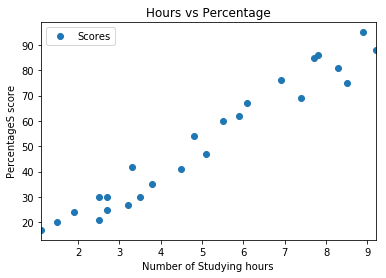

In [9]:
#Plotting the dataset
df.plot(x='Hours',y='Scores',style="o")
plt.rcParams["figure.figsize"]=[8,3]
plt.title('Hours vs Percentage')
plt.xlabel('Number of Studying hours')
plt.ylabel('PercentageS score')
plt.show()

In [10]:
#corr() can also be used to find pairwise correlation of all columns in dataset
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


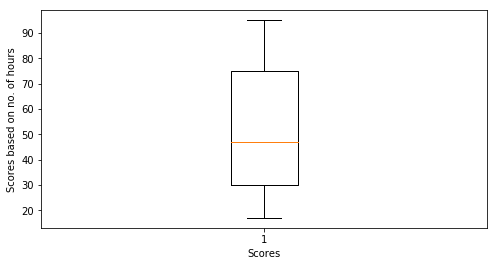

In [11]:
#Box plot
plt.rcParams["figure.figsize"]=[8,4]
data_scores = df['Scores']
plt.boxplot(data_scores)
plt.xlabel('Scores')
plt.ylabel('Scores based on no. of hours')
plt.show()

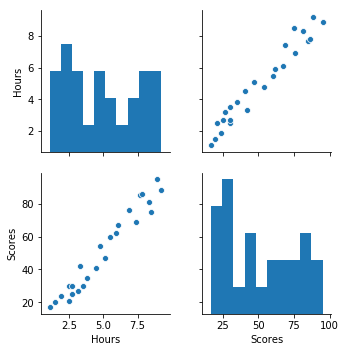

In [12]:
sns.pairplot(df, diag_kind="hist")

Preparing the data

In [13]:
x = df.iloc[:,:-1].values
y = df.iloc[:,1].values

Splitting the data

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=0)

In [15]:
len(x_train)

20

In [16]:
len(x_test)

5

Training the Model

In [17]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(x_train, y_train)
print("Training complete")

Training complete


Visualizing the Model

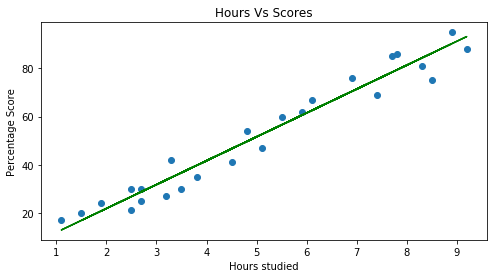

Slope of the regression line is : [9.91065648]
Intercept of the regression line is : 2.018160041434683


In [18]:
#Plotting the regression line
line = regressor.coef_*x + regressor.intercept_
#Plotting the test data
plt.scatter(x,y)
plt.title("Hours Vs Scores")
plt.xlabel("Hours studied")
plt.ylabel("Percentage Score")
plt.plot (x,line, color='green')
plt.show()

print("Slope of the regression line is :" ,regressor.coef_)
print("Intercept of the regression line is :",regressor.intercept_)

Making Suitable Predictions With The Data

In [19]:
print(x_test)
#Testing data - In Hours
y_pred = regressor.predict(x_test)
print(y_pred)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]
[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


In [20]:
#Comparing the actual and predicted values of test dataset
df1 = pd.DataFrame({'Actual': y_test,'Predicted':y_pred})
df1

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


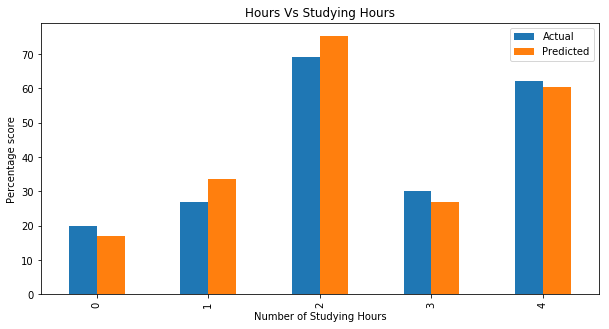

In [21]:
#Plotting the Bar graph to depict the differnce between the actual and predicted value
df1.plot(kind='bar',figsize=(10,5))
plt.title('Hours Vs Studying Hours')
plt.xlabel('Number of Studying Hours')
plt.ylabel('Percentage score')
#plt.grid(which='minor',linewidth='0.5',color='blue')
plt.show()

Predicting the percentage of the student if he/she studies for 9.25 hours/day

In [22]:
hours = 9.25
prediction = regressor.predict([[hours]])
print("No of study Hours = {}".format(hours))
print("Predicted Score = {}".format(prediction[0]))

#print("Predicted %age score if student studies for",hours,"hours is:",prediction[0])

No of study Hours = 9.25
Predicted Score = 93.69173248737538


Evaluating the Model

In [23]:
from sklearn import metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error:',metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174
Root Mean Squared Error: 4.6474476121003665


Thank you!!!!